# Opening and plotting images
---

In [1]:
%load_ext watermark

In [38]:
import geowombat as gw
from rasterio.coords import BoundingBox

In [39]:
%watermark -d -v -m -p geowombat,rasterio -g

2020-01-31 

CPython 3.6.9
IPython 7.11.1

geowombat 1.1.1
rasterio 1.1.2

compiler   : GCC 8.3.0
system     : Linux
release    : 4.15.0-74-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : 403a9f4b63de0981aaa534822565f6860caa4b2b


---

## Sentinel-2 @ 10m spatial resolution with Landsat-like bands

In [3]:
fn = '/media/jcgr/data/projects/global_fields/data/grids/ms/000960/brdf/L1C_T21JXM_A009917_20190129T135814_MTD.tif'

---
## Opening an image

### Basic opening

In [4]:
with gw.open(fn) as src:
    print(src)

<xarray.DataArray (band: 6, y: 1000, x: 1000)>
dask.array<open_rasterio-7d7818d525567dac34ba665d12da4da2<this-array>, shape=(6, 1000, 1000), dtype=uint16, chunksize=(1, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4 5 6
  * y        (y) float64 7.186e+06 7.186e+06 7.186e+06 ... 7.176e+06 7.176e+06
  * x        (x) float64 6.419e+05 6.419e+05 6.419e+05 ... 6.519e+05 6.519e+05
Attributes:
    transform:      (10.0, 0.0, 641881.6351531447, 0.0, -10.0, 7186139.177598...
    crs:            +init=epsg:32721
    res:            (10.0, 10.0)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan, nan, nan)
    scales:         (1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    AREA_OR_POINT:  Area
    filename:       /media/jcgr/data/projects/global_fields/data/grids/ms/000...
    resampling:     nearest


### Specify band names

In [8]:
with gw.open(fn,
             band_names=['b', 'g', 'r', 'n', 's1', 's2']) as src:
    
    print(src)

<xarray.DataArray (band: 6, y: 1000, x: 1000)>
dask.array<open_rasterio-7d7818d525567dac34ba665d12da4da2<this-array>, shape=(6, 1000, 1000), dtype=uint16, chunksize=(1, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) <U2 'b' 'g' 'r' 'n' 's1' 's2'
  * y        (y) float64 7.186e+06 7.186e+06 7.186e+06 ... 7.176e+06 7.176e+06
  * x        (x) float64 6.419e+05 6.419e+05 6.419e+05 ... 6.519e+05 6.519e+05
Attributes:
    transform:      (10.0, 0.0, 641881.6351531447, 0.0, -10.0, 7186139.177598...
    crs:            +init=epsg:32721
    res:            (10.0, 10.0)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan, nan, nan)
    scales:         (1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    AREA_OR_POINT:  Area
    filename:       /media/jcgr/data/projects/global_fields/data/grids/ms/000...
    resampling:     nearest


### Specify band names by sensor

In [9]:
with gw.config.update(sensor='s2l7'):
    
    with gw.open(fn) as src:
        print(src)

<xarray.DataArray (band: 6, y: 1000, x: 1000)>
dask.array<open_rasterio-7d7818d525567dac34ba665d12da4da2<this-array>, shape=(6, 1000, 1000), dtype=uint16, chunksize=(1, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) <U5 'blue' 'green' 'red' 'nir' 'swir1' 'swir2'
  * y        (y) float64 7.186e+06 7.186e+06 7.186e+06 ... 7.176e+06 7.176e+06
  * x        (x) float64 6.419e+05 6.419e+05 6.419e+05 ... 6.519e+05 6.519e+05
Attributes:
    transform:      (10.0, 0.0, 641881.6351531447, 0.0, -10.0, 7186139.177598...
    crs:            +init=epsg:32721
    res:            (10.0, 10.0)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan, nan, nan)
    scales:         (1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    AREA_OR_POINT:  Area
    sensor:         Sentinel 2 Multi-Spectral Instrument (MSI) with 6 Landsat...
    filename:       /media/jcgr/data/projects/global_fields/data/grids/ms/000...
    resampling:     nearest


---
## Plotting

### Plot a single band

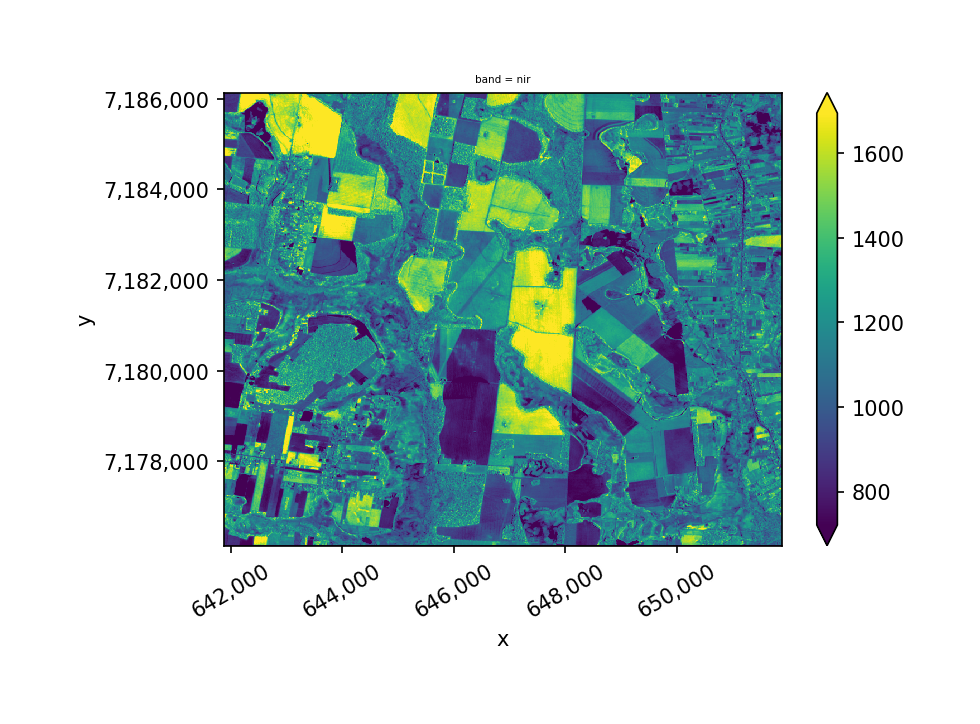

In [11]:
with gw.config.update(sensor='s2l7'):
    
    with gw.open(fn) as src:
        src.sel(band='nir').gw.imshow(robust=True)

### Plot three bands

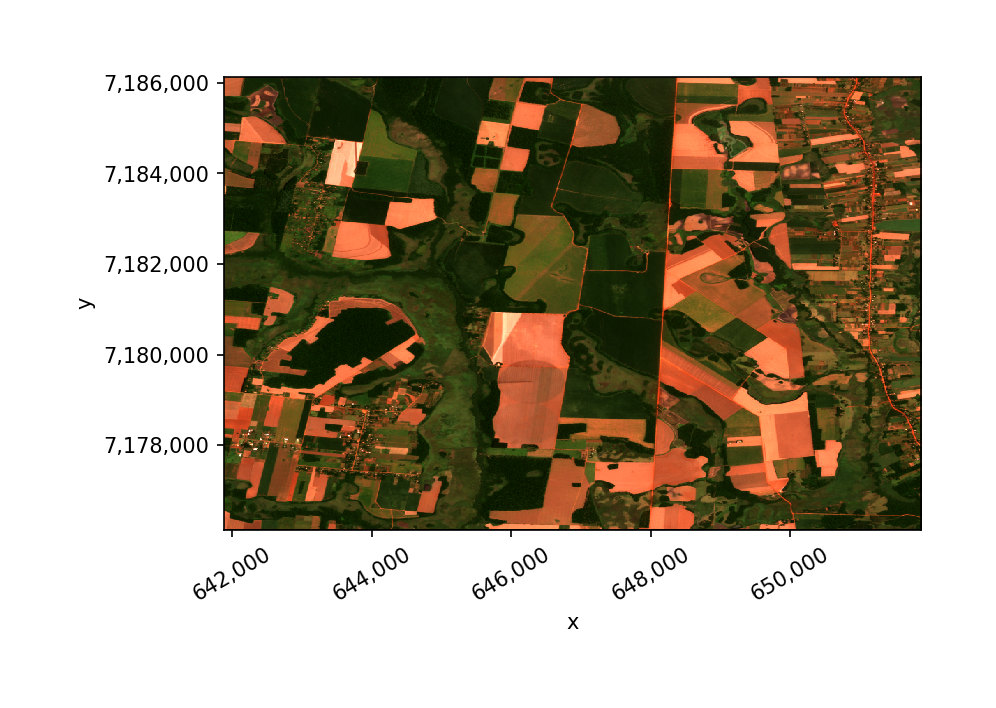

In [29]:
with gw.config.update(sensor='s2l7'):
    
    with gw.open(fn) as src:
        src.sel(band=['red', 'green', 'blue']).gw.imshow(robust=True)

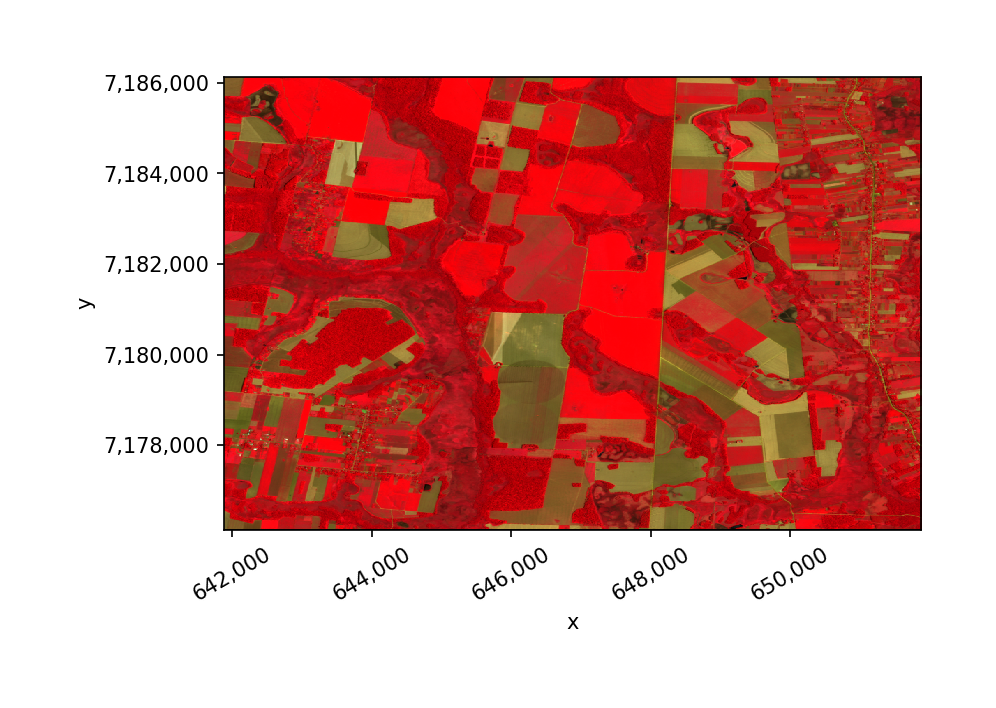

In [31]:
with gw.config.update(sensor='s2l7'):
    
    with gw.open(fn) as src:
        src.sel(band=['nir', 'red', 'green']).gw.imshow(robust=True)

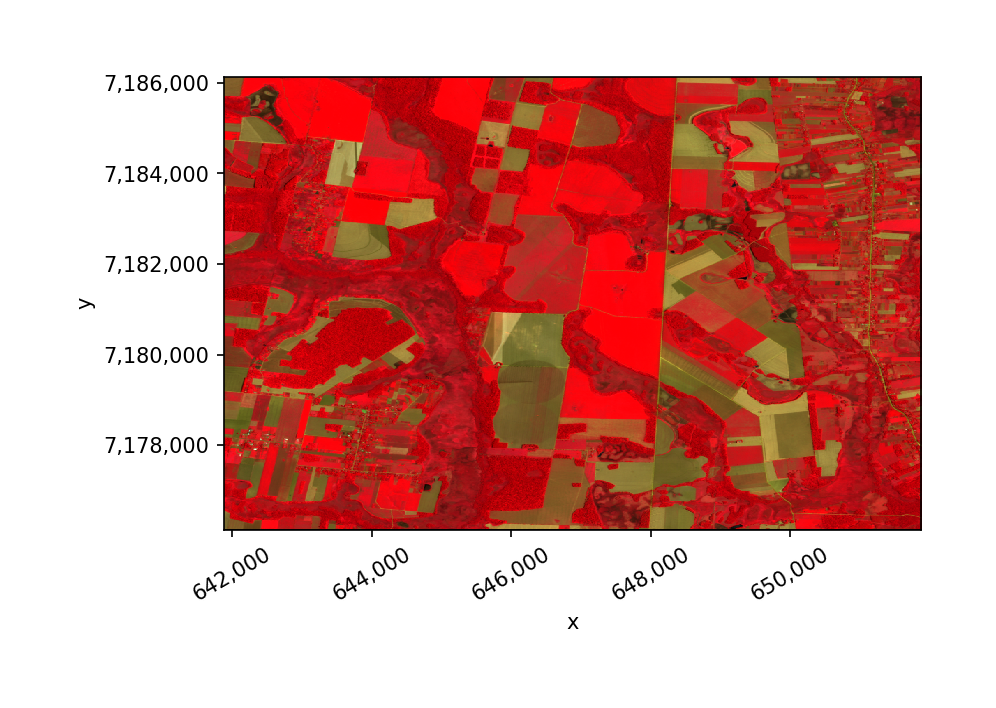

In [33]:
with gw.config.update(sensor='s2l7'):
    
    with gw.open(fn) as src:
        src.sel(band=['green', 'red', 'nir']).gw.imshow(flip=True, robust=True)

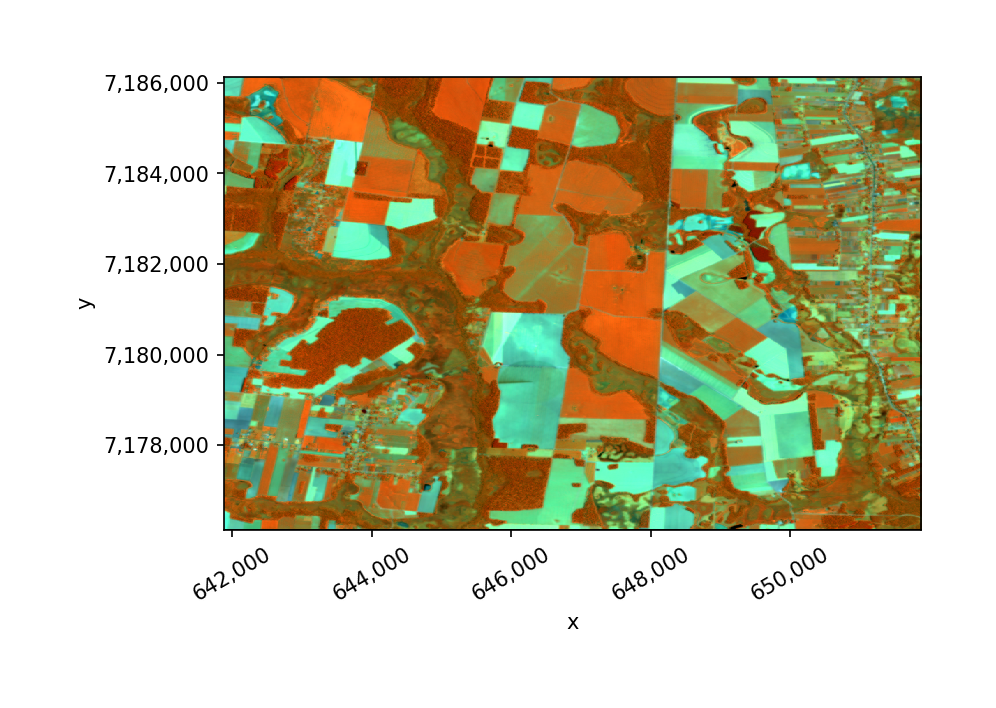

In [35]:
with gw.config.update(sensor='s2l7'):
    
    with gw.open(fn) as src:
        src.sel(band=['swir2', 'swir1', 'nir']).gw.imshow(flip=True, robust=True)

## Resampling

### Resample to 100m x 100m using nearest neighbor

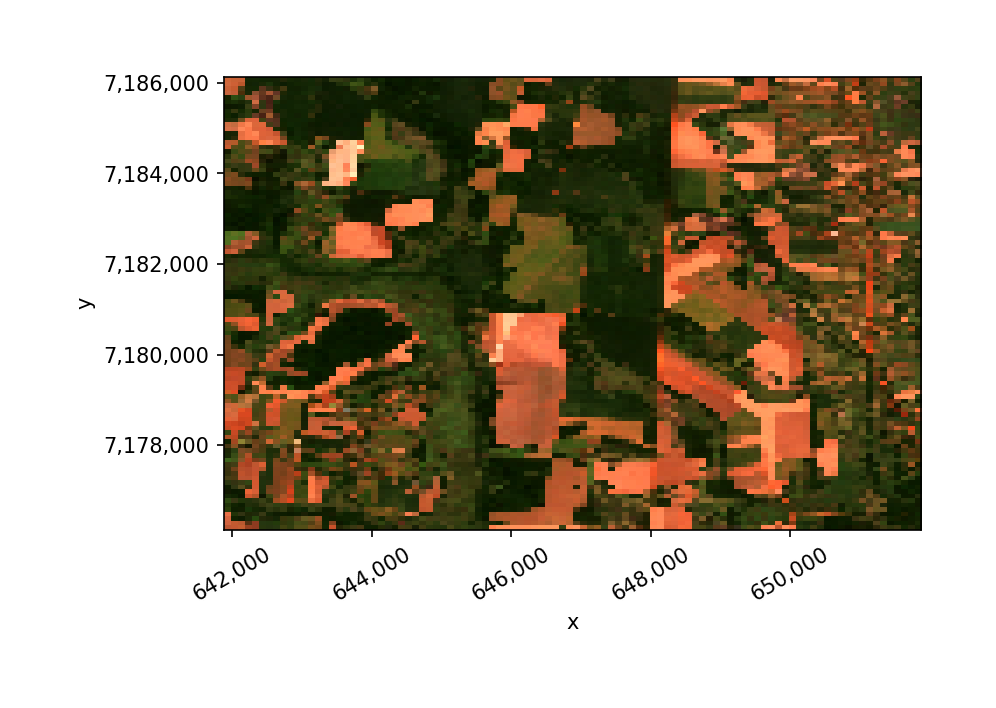

In [13]:
with gw.config.update(sensor='s2l7', ref_res=(100, 100)):
    
    with gw.open(fn) as src:
        src.sel(band=['red', 'green', 'blue']).gw.imshow(robust=True)

### Resample to 100m x 100m using cubic interpolation

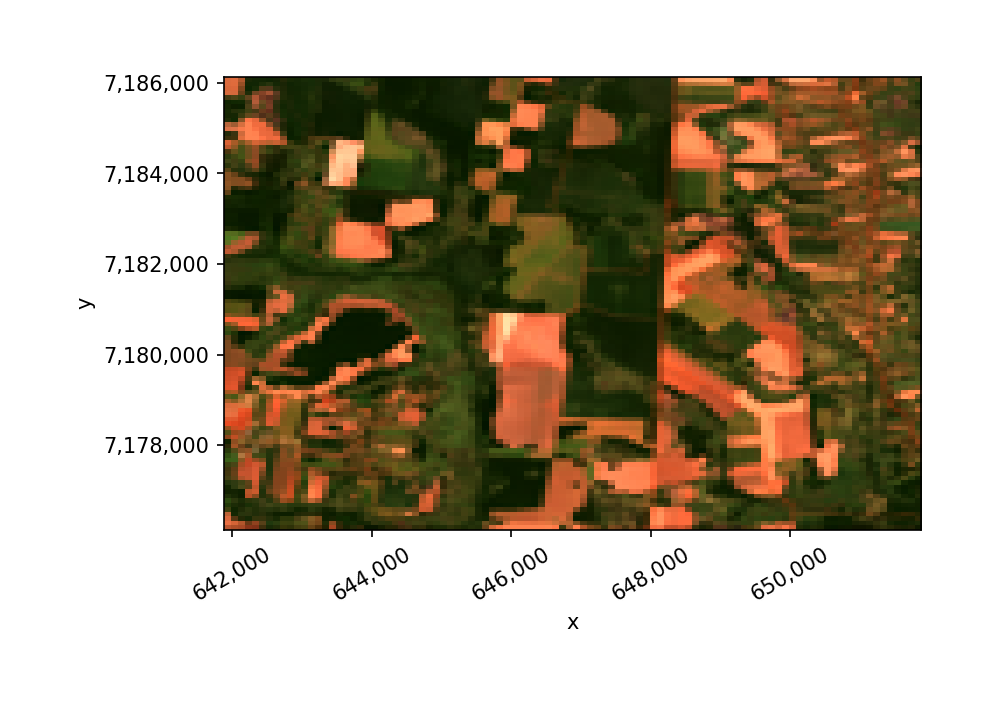

In [14]:
with gw.config.update(sensor='s2l7', ref_res=(100, 100)):
    
    with gw.open(fn, resampling='cubic') as src:
        src.sel(band=['red', 'green', 'blue']).gw.imshow(robust=True)

## Moving windows

### Compute the moving mean with a 5x5 window

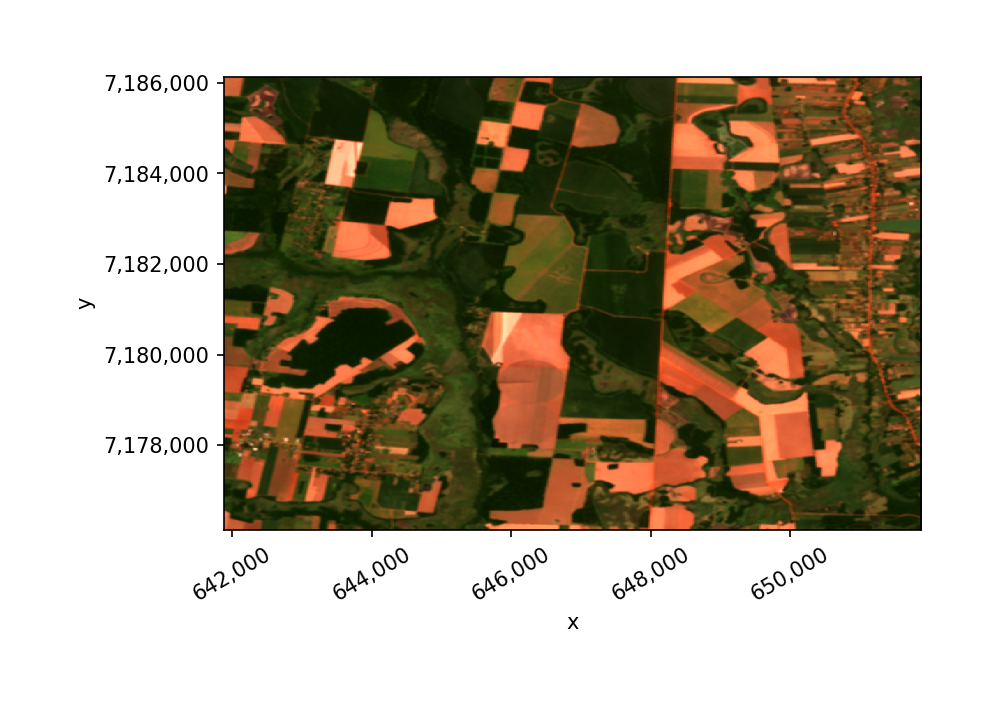

In [23]:
with gw.config.update(sensor='s2l7'):
    
    with gw.open(fn) as src:
        
        res = gw.moving(src, band_names=src.band.values, stat='mean', w=5, nodata=0, n_jobs=8)
    
        res.sel(band=['red', 'green', 'blue']).gw.imshow(robust=True)

### Compute the moving median with a 15x15 window

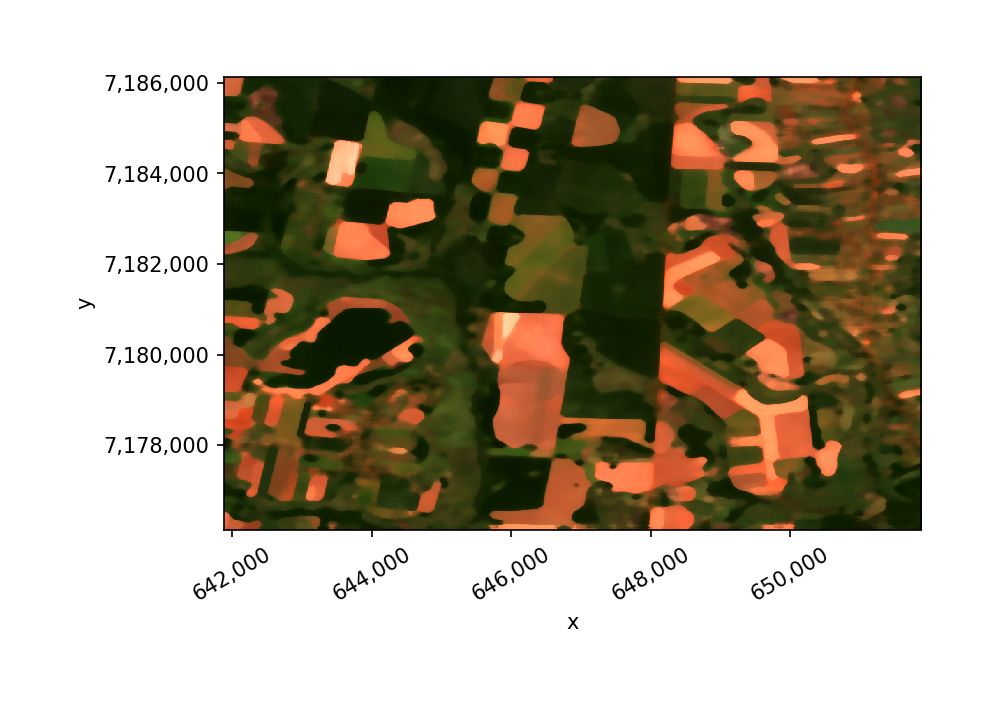

In [25]:
with gw.config.update(sensor='s2l7'):
    
    with gw.open(fn) as src:
        
        res = gw.moving(src, band_names=src.band.values, stat='perc', perc=50, w=15, nodata=0, n_jobs=8)
    
        res.sel(band=['red', 'green', 'blue']).gw.imshow(robust=True)

### Compute the moving variance with a 15x15 window

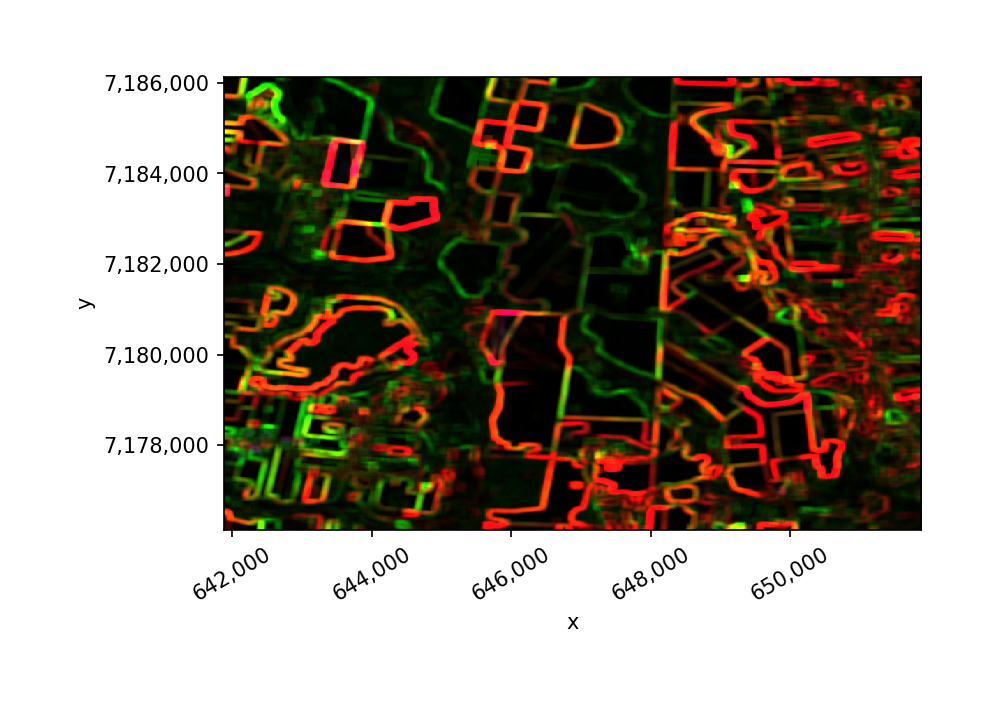

In [37]:
with gw.config.update(sensor='s2l7'):
    
    with gw.open(fn) as src:
        
        res = gw.moving(src, band_names=src.band.values, stat='var', w=15, nodata=0, n_jobs=8)
    
        res.sel(band=['swir1', 'nir', 'green']).gw.imshow(robust=True)

## Subsetting

In [41]:
bounds = BoundingBox(top=7179375.71, left=642764.10, bottom=7178084.13, right=644743.72)

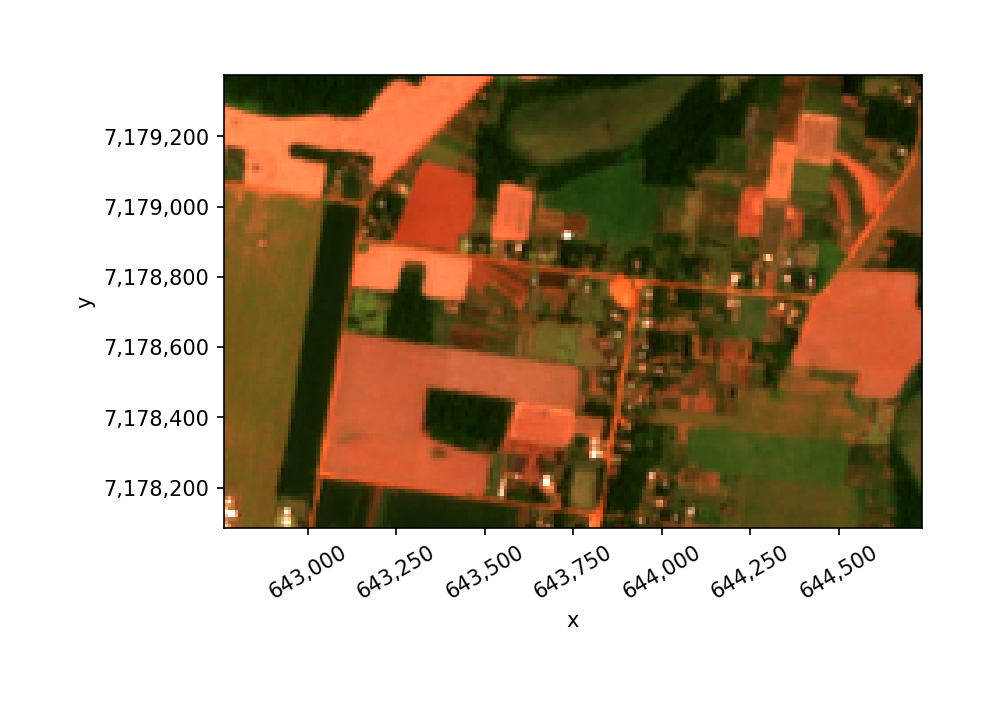

In [43]:
with gw.config.update(sensor='s2l7', ref_bounds=bounds):
    
    with gw.open(fn) as src:
        src.sel(band=['red', 'green', 'blue']).gw.imshow(robust=True)

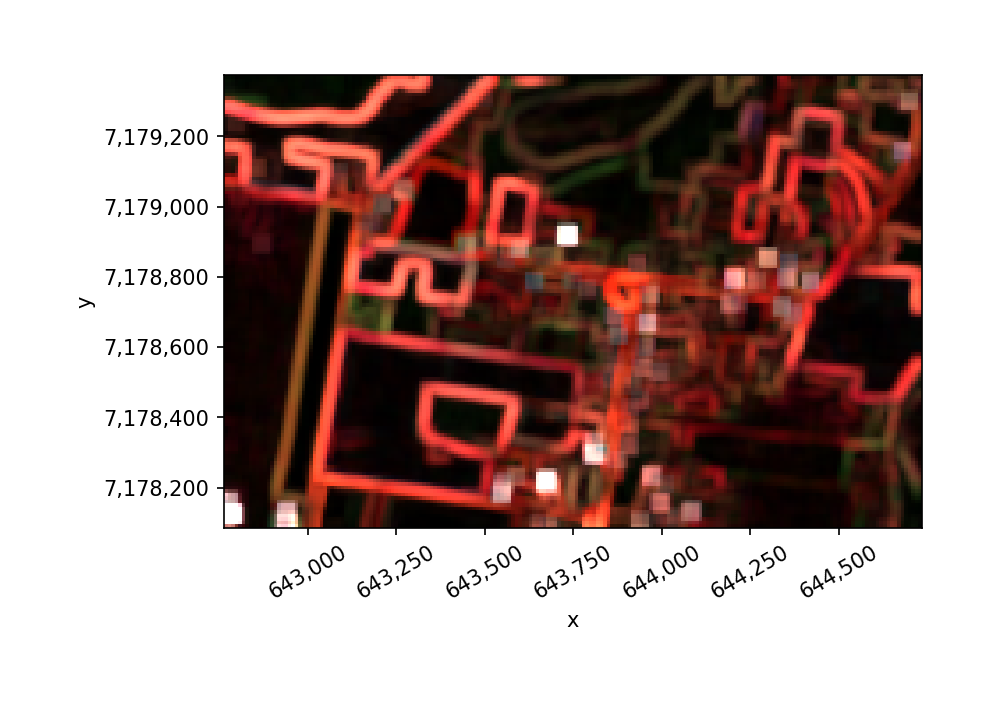

In [46]:
with gw.config.update(sensor='s2l7', ref_bounds=bounds):
    
    with gw.open(fn) as src:
        
        res = gw.moving(src, band_names=src.band.values, stat='std', w=5, nodata=0, n_jobs=8)
        res.sel(band=['red', 'green', 'blue']).gw.imshow(robust=True)